Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, f1_score, accuracy_score

Read in csv

In [2]:
df = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

Next few sections are exploratory data analysis and data cleaning

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [5]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df = df.dropna(subset=['Embarked'])


In [8]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df_test['Age'] = df_test['Age'].fillna(df_test['Age'].mean())
df_test['Fare'] = df_test['Fare'].fillna(df_test['Fare'].median())

In [9]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,889.000000,889.000000,889.000000,889,889,889.000000,889.000000,889.000000,889,889.000000,202,889
unique,NaN,NaN,NaN,889,2,NaN,NaN,NaN,680,NaN,146,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.382452,2.311586,NaN,NaN,29.642093,0.524184,0.382452,NaN,32.096681,NaN,NaN
std,256.998173,0.486260,0.834700,NaN,NaN,12.968346,1.103705,0.806761,NaN,49.697504,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,224.000000,0.000000,2.000000,NaN,NaN,22.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,29.642093,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.000000,1.000000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [11]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

Grouping by sex

In [12]:
df_num= df[['Age', 'SibSp', 'Parch', 'Fare']]

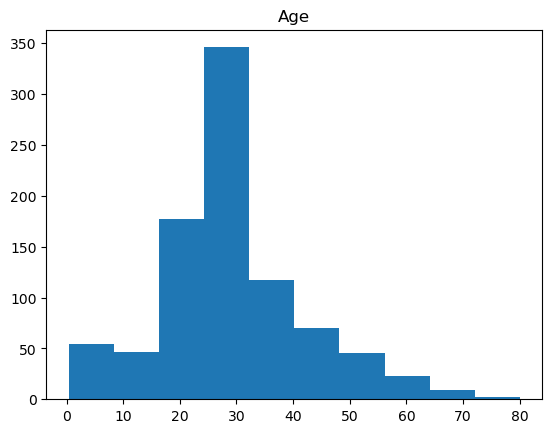

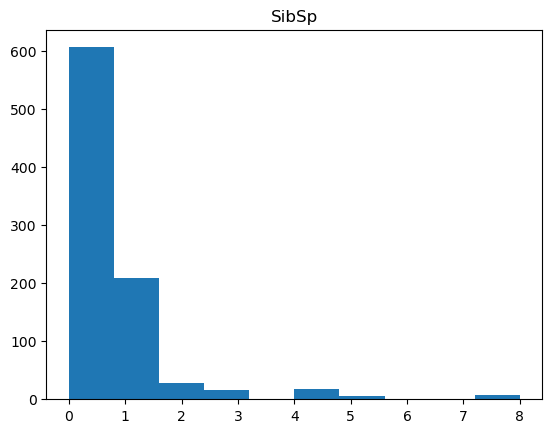

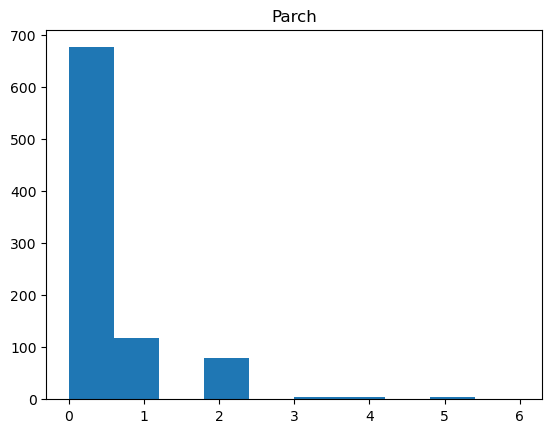

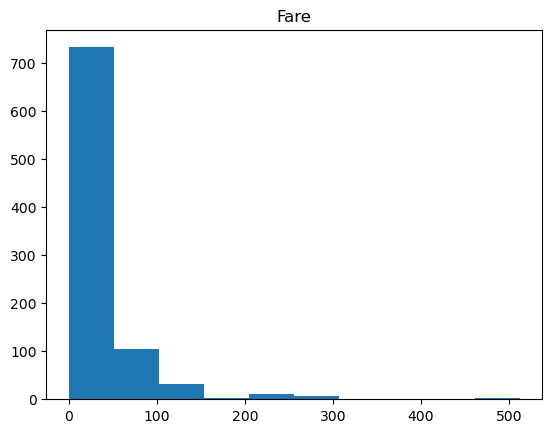

In [13]:
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()


In [14]:
pd.pivot_table(df, index='Survived', values =['Age', 'SibSp', 'Parch', 'Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.402116,22.117887,0.329690,0.553734
1,28.414879,48.209498,0.467647,0.476471


In [15]:
pd.pivot_table(df, index='Survived', columns='Pclass', values='PassengerId', aggfunc='count')



Pclass,1,2,3
Survived,,,
0,80,97,372
1,134,87,119


In [16]:
pd.pivot_table(df, index='Survived', columns='Sex', values='PassengerId', aggfunc='count')


Sex,female,male
Survived,,
0,81,468
1,231,109


In [17]:
pd.pivot_table(df, index='Survived', columns='Embarked', values='PassengerId', aggfunc='count')

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [18]:
df['Cabin'].head(15)

0      NaN
1      C85
2      NaN
3     C123
4      NaN
5      NaN
6      E46
7      NaN
8      NaN
9      NaN
10      G6
11    C103
12     NaN
13     NaN
14     NaN
Name: Cabin, dtype: object

In [19]:
df['cabin_letter'] = df.Cabin.apply(lambda x: str(x)[0] if pd.notna(x) and len(str(x)) > 0 else 'n')
df_test['cabin_letter'] = df_test.Cabin.apply(lambda x: str(x)[0] if pd.notna(x) and len(str(x)) > 0 else 'n')


In [20]:
df['cabin_letter'].value_counts()

cabin_letter
n    687
C     59
B     45
D     33
E     32
A     15
F     13
G      4
T      1
Name: count, dtype: int64

In [21]:
pd.pivot_table(df, index='Survived', columns='cabin_letter', values='PassengerId', aggfunc='count')


cabin_letter,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,33.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


In [22]:
df.Name.head(30)

0                               Braund, Mr. Owen Harris
1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
5                                      Moran, Mr. James
6                               McCarthy, Mr. Timothy J
7                        Palsson, Master. Gosta Leonard
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                   Nasser, Mrs. Nicholas (Adele Achem)
10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
15                     Hewlett, Mrs. (Mary D Kingcome) 
16                                 Rice, Master. Eugene
17                         Williams, Mr. Charles

In [23]:
df['name_title'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0])
df_test['name_title'] = df_test['Name'].apply(lambda x: x.split(',')[1].split('.')[0])

In [24]:
df['name_title'].value_counts()

name_title
Mr              517
Miss            181
Mrs             124
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Ms                1
Mme               1
Don               1
Lady              1
Sir               1
Capt              1
the Countess      1
Jonkheer          1
Name: count, dtype: int64

In [25]:
df['name_title_clean'] = np.where(df['name_title'].isin(df['name_title'].value_counts()[df['name_title'].value_counts() <8].index), 'Other', df['name_title'])
df_test['name_title_clean'] = np.where(df_test['name_title'].isin(df_test['name_title'].value_counts()[df_test['name_title'].value_counts() <8].index), 'Other', df_test['name_title'])

In [26]:
df['name_title_clean'].value_counts()

name_title_clean
 Mr        517
 Miss      181
 Mrs       124
 Master     40
Other       27
Name: count, dtype: int64

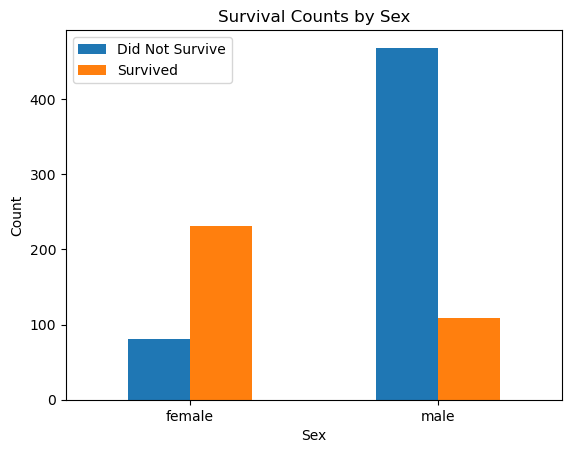

In [27]:

summarySex = df.groupby(['Sex', 'Survived']).size().unstack(fill_value=0)
summarySex.plot(kind='bar', stacked=False)

# Adding labels and title
plt.title('Survival Counts by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability

# Show the legend
plt.legend(['Did Not Survive', 'Survived'])

# Display the plot
plt.show()


create age bins which contain equal amounts of people

In [28]:
df['Age'].min()

np.float64(0.42)

In [29]:
df['Age'].max()

np.float64(80.0)

create age bins that represent child, teenager, adult, 

In [30]:
bins = [0, 12, 18, 30, 45, 60, 80]  # Adjust these ranges as needed
labels = ['0-12', '13-18', '19-30', '31-45', '46-60', '61-80']  # Labels for the bins
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
summaryAge = df.groupby(['AgeGroup', 'Survived'], observed=False).size().unstack(fill_value=0)


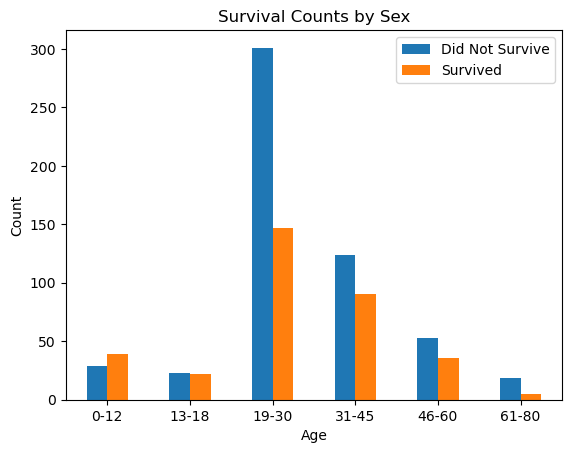

In [31]:
summaryAge.plot(kind='bar', stacked=False)

# Adding labels and title
plt.title('Survival Counts by Sex')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability

# Show the legend
plt.legend(['Did Not Survive', 'Survived'])

# Display the plot
plt.show()

grouping by Embarked

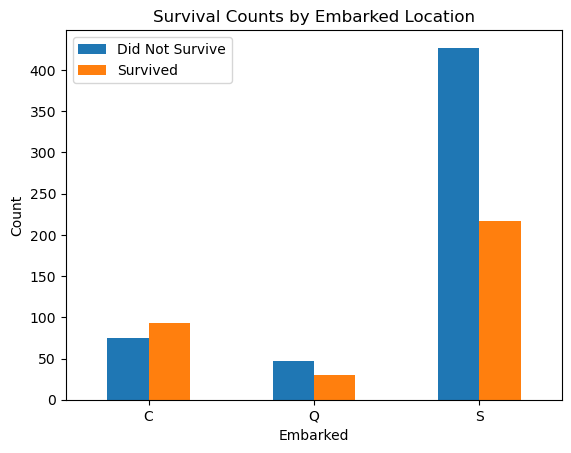

In [32]:
summarySex = df.groupby(['Embarked', 'Survived']).size().unstack(fill_value=0)
summarySex.plot(kind='bar', stacked=False)

# Adding labels and title
plt.title('Survival Counts by Embarked Location')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability

# Show the legend
plt.legend(['Did Not Survive', 'Survived'])

# Display the plot
plt.show()

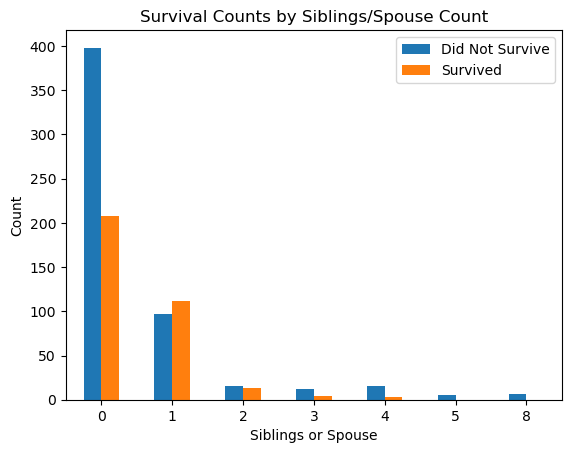

In [33]:
summarySibSp = df.groupby(['SibSp', 'Survived']).size().unstack(fill_value=0)
summarySibSp.plot(kind='bar', stacked=False)

plt.title('Survival Counts by Siblings/Spouse Count')
plt.xlabel('Siblings or Spouse')
plt.ylabel('Count')
plt.xticks(rotation=0) 

plt.legend(['Did Not Survive', 'Survived'])

# Display the plot
plt.show()

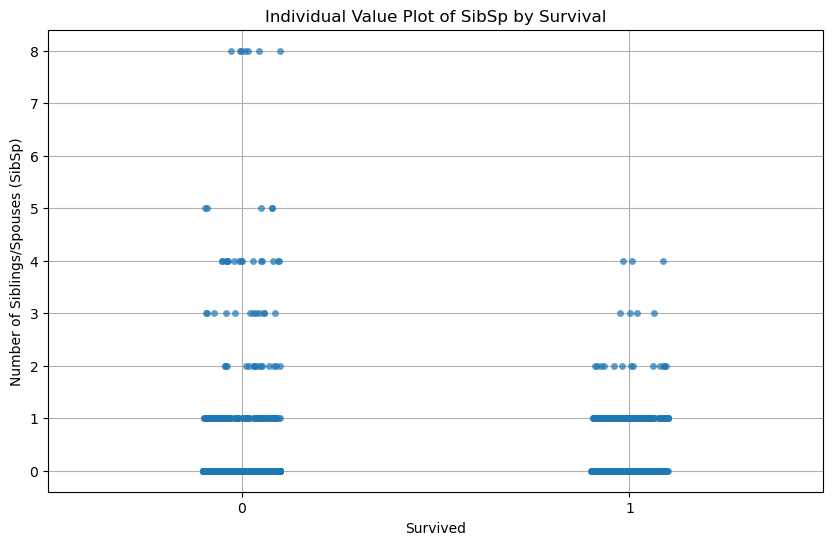

In [34]:
plt.figure(figsize=(10, 6))
sns.stripplot(x='Survived', y='SibSp', data=df, alpha=0.7)

plt.title('Individual Value Plot of SibSp by Survival')
plt.xlabel('Survived')
plt.ylabel('Number of Siblings/Spouses (SibSp)')
plt.grid()

plt.show()

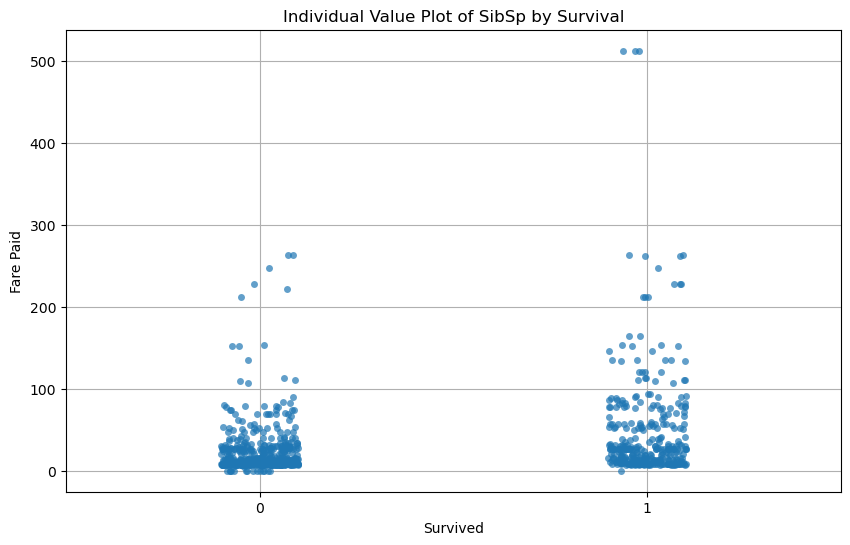

In [35]:
plt.figure(figsize=(10, 6))
sns.stripplot(x='Survived', y='Fare', data=df, alpha=0.7)

plt.title('Individual Value Plot of SibSp by Survival')
plt.xlabel('Survived')
plt.ylabel('Fare Paid')
plt.grid()

plt.show()

One hot encoding

In [36]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_letter,name_title,name_title_clean,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,n,Mr,Mr,19-30
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,Mrs,Mrs,31-45
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,n,Miss,Miss,19-30
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,Mrs,Mrs,31-45
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,n,Mr,Mr,31-45


In [37]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_letter,name_title,name_title_clean
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,n,Mr,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,n,Mrs,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,n,Mr,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,n,Mr,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,n,Mrs,Mrs


In [38]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked', 'name_title_clean','cabin_letter'], drop_first=True)
df_test = pd.get_dummies(df_test, columns=['Sex', 'Embarked', 'name_title_clean','cabin_letter'], drop_first=True)

In [39]:
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,...,name_title_clean_ Mrs,name_title_clean_Other,cabin_letter_B,cabin_letter_C,cabin_letter_D,cabin_letter_E,cabin_letter_F,cabin_letter_G,cabin_letter_T,cabin_letter_n
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,...,False,False,False,False,False,False,False,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,...,True,False,False,True,False,False,False,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,...,False,False,False,False,False,False,False,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,...,True,False,False,True,False,False,False,False,False,False
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,...,False,False,False,False,False,False,False,False,False,True


Need to drop some Name and ticket which will not be meaniful - too many options. 

In [40]:
Corr_Data = df[['Survived', 'Pclass', 'Age', 'SibSp','Parch','Fare']]  # Features

In [41]:
Corr_Data.dtypes

Survived      int64
Pclass        int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
dtype: object

In [42]:
correlation_matrix = Corr_Data.corr()

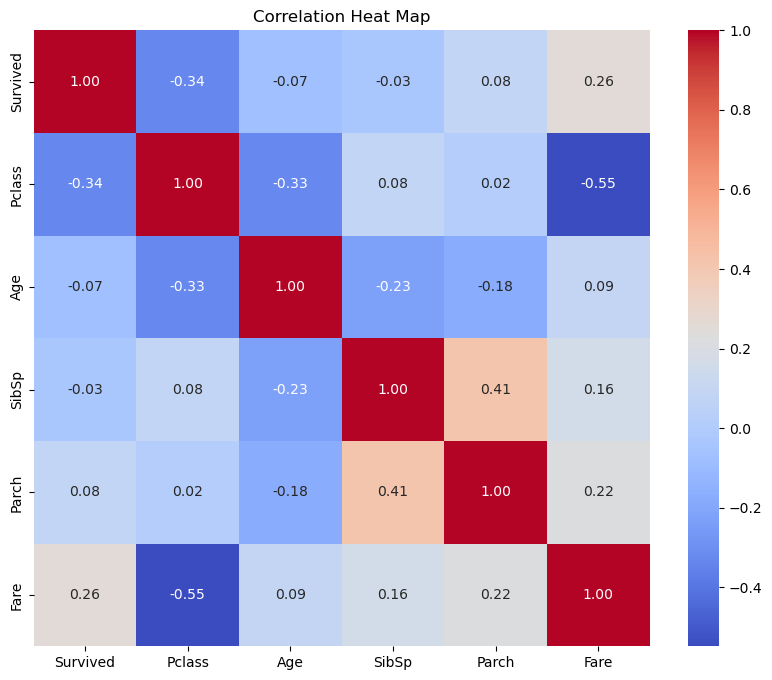

In [43]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Heat Map')
plt.show()

In [44]:
df['norm_fare'] = np.log(df['Fare']+1)
df_test['norm_fare'] = np.log(df_test['Fare']+1)

In [45]:
df['norm_fare'].head(20)

0     2.110213
1     4.280593
2     2.188856
3     3.990834
4     2.202765
5     2.246893
6     3.967694
7     3.094446
8     2.495954
9     3.436268
10    2.873565
11    3.316003
12    2.202765
13    3.474293
14    2.180892
15    2.833213
16    3.405355
17    2.639057
18    2.944439
19    2.107178
Name: norm_fare, dtype: float64

In [46]:
df.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'name_title', 'AgeGroup', 'Sex_male',
       'Embarked_Q', 'Embarked_S', 'name_title_clean_ Miss',
       'name_title_clean_ Mr', 'name_title_clean_ Mrs',
       'name_title_clean_Other', 'cabin_letter_B', 'cabin_letter_C',
       'cabin_letter_D', 'cabin_letter_E', 'cabin_letter_F', 'cabin_letter_G',
       'cabin_letter_T', 'cabin_letter_n', 'norm_fare'],
      dtype='object')

In [47]:
X = df.drop(['Survived', 'Name','Ticket','Cabin', 'name_title', 'Fare', 'AgeGroup', 'PassengerId'], axis=1)  # Features
y = df['Survived']   

In [48]:
X.head()

,Pclass,Age,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S,name_title_clean_ Miss,name_title_clean_ Mr,name_title_clean_ Mrs,name_title_clean_Other,cabin_letter_B,cabin_letter_C,cabin_letter_D,cabin_letter_E,cabin_letter_F,cabin_letter_G,cabin_letter_T,cabin_letter_n,norm_fare
0,3,22.0,1,0,True,False,True,False,True,False,False,False,False,False,False,False,False,False,True,2.110213
1,1,38.0,1,0,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,4.280593
2,3,26.0,0,0,False,False,True,True,False,False,False,False,False,False,False,False,False,False,True,2.188856
3,1,35.0,1,0,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,3.990834
4,3,35.0,0,0,True,False,True,False,True,False,False,False,False,False,False,False,False,False,True,2.202765


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [50]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [51]:
y_pred = rf_model.predict(X_test)


Create confusion matrix to picture results

Confusion Matrix:
 [[89 20]
 [16 53]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.82      0.83       109
           1       0.73      0.77      0.75        69

    accuracy                           0.80       178
   macro avg       0.79      0.79      0.79       178
weighted avg       0.80      0.80      0.80       178



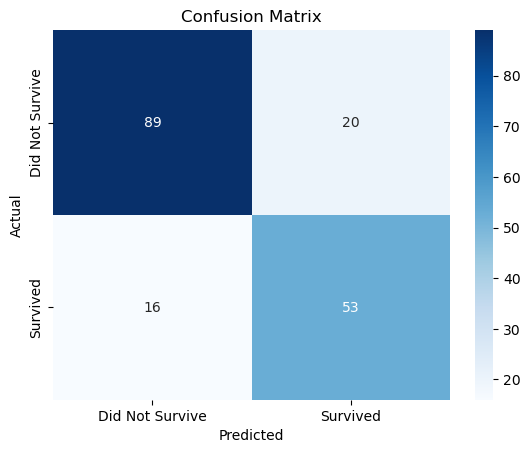

In [52]:
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_matrix)

class_report = classification_report(y_test, y_pred)
print('Classification Report:\n', class_report)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Did Not Survive', 'Survived'], yticklabels=['Did Not Survive', 'Survived'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


In [53]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.797752808988764


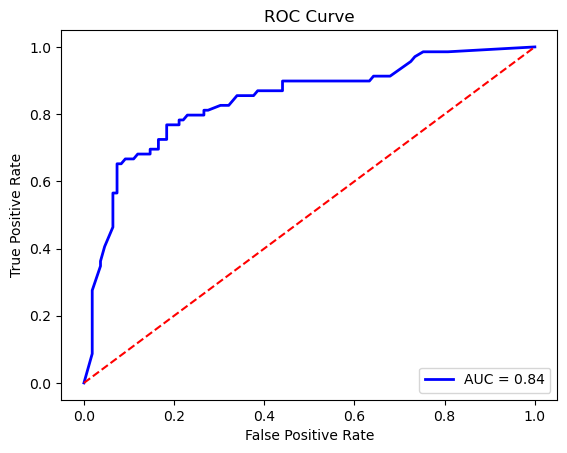

In [54]:
y_probs = rf_model.predict_proba(X_test)[:, 1]  # Get the probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

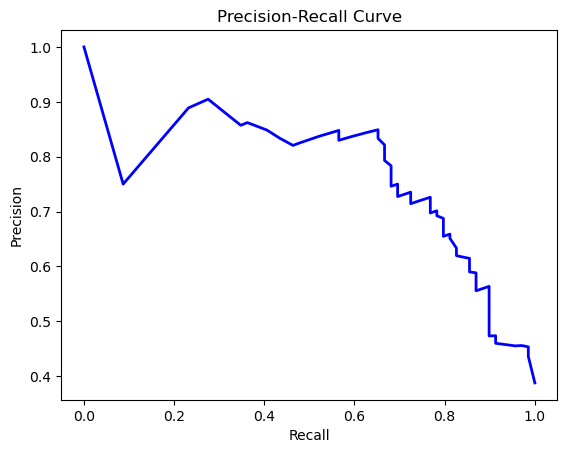

In [55]:
precision, recall, _ = precision_recall_curve(y_test, y_probs)

plt.figure()
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [56]:
f1 = f1_score(y_test, y_pred)
print('F1 Score:', f1)

F1 Score: 0.7464788732394366


Feature ranking:
1. norm_fare (0.2293)
2. Age (0.1979)
3. name_title_clean_ Mr (0.1149)
4. Sex_male (0.1144)
5. Pclass (0.0712)
6. SibSp (0.0566)
7. name_title_clean_ Mrs (0.0378)
8. name_title_clean_ Miss (0.0350)
9. Parch (0.0342)
10. cabin_letter_n (0.0310)
11. Embarked_S (0.0243)
12. Embarked_Q (0.0116)
13. cabin_letter_E (0.0101)
14. cabin_letter_C (0.0084)
15. cabin_letter_B (0.0079)
16. cabin_letter_D (0.0072)
17. name_title_clean_Other (0.0055)
18. cabin_letter_F (0.0019)
19. cabin_letter_G (0.0004)
20. cabin_letter_T (0.0003)


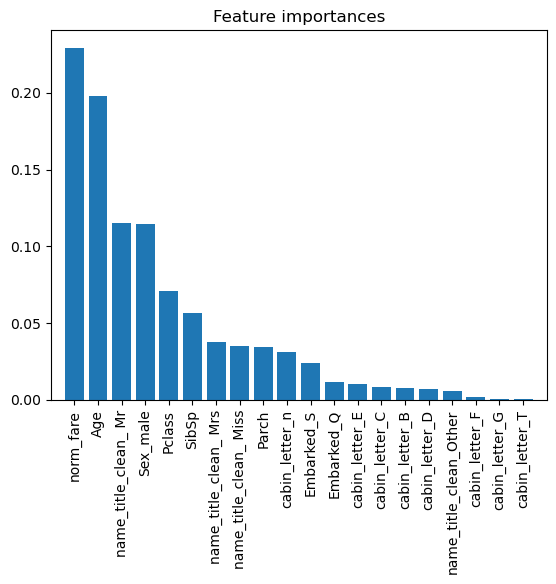

In [57]:
feature_names = X.columns  # Get feature names

importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Print feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f + 1}. {feature_names[indices[f]]} ({importances[indices[f]]:.4f})")

# Plot the feature importances
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)  # Show feature names on x-axis
plt.xlim([-1, X.shape[1]])
plt.show()

In [58]:
cv_scores = cross_val_score(rf_model, X, y, cv=5)  # 5-fold cross-validation
print('Cross-Validation Scores:', cv_scores)
print('Mean CV Score:', cv_scores.mean())

Cross-Validation Scores: [0.80337079 0.79213483 0.84269663 0.75280899 0.85310734]
Mean CV Score: 0.8088237161175649


In [59]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [4, 8],
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Best parameters: {'max_depth': 20, 'min_samples_split': 8, 'n_estimators': 100}
Best score: 0.859332217078696


In [60]:
best_params = {
    'max_depth': 10,
    'min_samples_split': 8,
    'n_estimators': 300
}

optimized_model = RandomForestClassifier(**best_params)

optimized_model.fit(X_train, y_train)

y_pred = optimized_model.predict(X_test)

Confusion Matrix:
 [[90 19]
 [20 49]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.83      0.82       109
           1       0.72      0.71      0.72        69

    accuracy                           0.78       178
   macro avg       0.77      0.77      0.77       178
weighted avg       0.78      0.78      0.78       178



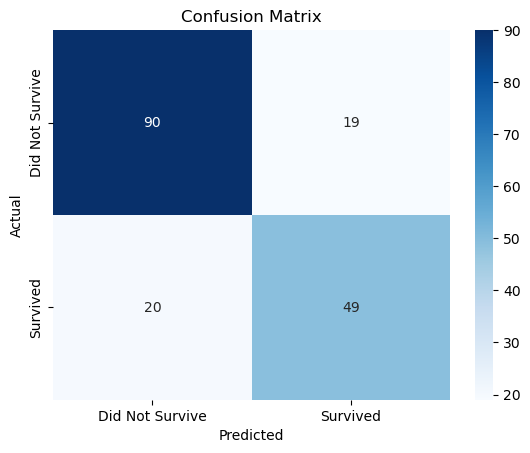

In [61]:
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_matrix)

class_report = classification_report(y_test, y_pred)
print('Classification Report:\n', class_report)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Did Not Survive', 'Survived'], yticklabels=['Did Not Survive', 'Survived'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


In [65]:
f1 = f1_score(y_test, y_pred)
print('F1 Score:', f1)

F1 Score: 0.7153284671532847


In [66]:
cv_scores = cross_val_score(optimized_model, X, y, cv=5)  # 5-fold cross-validation
print('Cross-Validation Scores:', cv_scores)
print('Mean CV Score:', cv_scores.mean())

Cross-Validation Scores: [0.82022472 0.79775281 0.87078652 0.79775281 0.84745763]
Mean CV Score: 0.8267948962102455


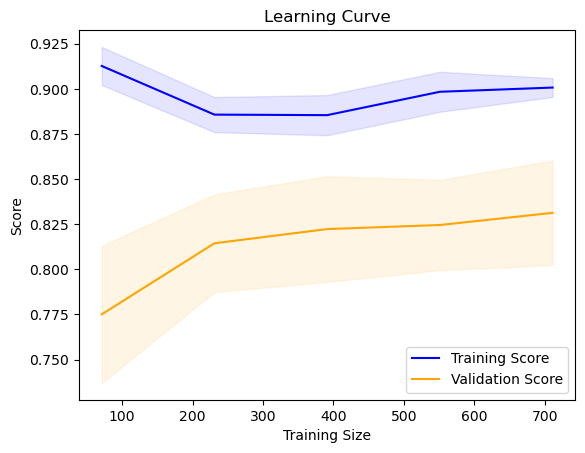

In [67]:
# Assuming 'model' is your trained Random Forest model
train_sizes, train_scores, test_scores = learning_curve(optimized_model, X, y, cv=5)

# Calculate the mean and standard deviation of training and testing scores
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_std = test_scores.std(axis=1)

# Plotting the learning curves
plt.plot(train_sizes, train_mean, label='Training Score', color='blue')
plt.plot(train_sizes, test_mean, label='Validation Score', color='orange')

# Add standard deviation to the plot
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='orange', alpha=0.1)

plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend()
plt.show()

In [68]:
X_test_new = df_test.drop(['Name','Ticket','Cabin', 'name_title', 'Fare', 'PassengerId'], axis=1)

In [69]:
X_test_new.isnull().sum()

Pclass                    0
Age                       0
SibSp                     0
Parch                     0
Sex_male                  0
Embarked_Q                0
Embarked_S                0
name_title_clean_ Miss    0
name_title_clean_ Mr      0
name_title_clean_ Mrs     0
name_title_clean_Other    0
cabin_letter_B            0
cabin_letter_C            0
cabin_letter_D            0
cabin_letter_E            0
cabin_letter_F            0
cabin_letter_G            0
cabin_letter_n            0
norm_fare                 0
dtype: int64

In [72]:
X_test_new.head(10)

,Pclass,Age,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S,name_title_clean_ Miss,name_title_clean_ Mr,name_title_clean_ Mrs,name_title_clean_Other,cabin_letter_B,cabin_letter_C,cabin_letter_D,cabin_letter_E,cabin_letter_F,cabin_letter_G,cabin_letter_n,norm_fare
0,3,34.5,0,0,True,True,False,False,True,False,False,False,False,False,False,False,False,True,2.178064
1,3,47.0,1,0,False,False,True,False,False,True,False,False,False,False,False,False,False,True,2.079442
2,2,62.0,0,0,True,True,False,False,True,False,False,False,False,False,False,False,False,True,2.369075
3,3,27.0,0,0,True,False,True,False,True,False,False,False,False,False,False,False,False,True,2.268252
4,3,22.0,1,1,False,False,True,False,False,True,False,False,False,False,False,False,False,True,2.586824
5,3,14.0,0,0,True,False,True,False,True,False,False,False,False,False,False,False,False,True,2.324836
6,3,30.0,0,0,False,True,False,True,False,False,False,False,False,False,False,False,False,True,2.155152
7,2,26.0,1,1,True,False,True,False,True,False,False,False,False,False,False,False,False,True,3.401197
8,3,18.0,0,0,False,False,False,False,False,True,False,False,False,False,False,False,False,True,2.107689
9,3,21.0,2,0,True,False,True,False,True,False,False,False,False,False,False,False,False,True,3.224858


In [73]:
X_test_new.dtypes

Pclass                      int64
Age                       float64
SibSp                       int64
Parch                       int64
Sex_male                     bool
Embarked_Q                   bool
Embarked_S                   bool
name_title_clean_ Miss       bool
name_title_clean_ Mr         bool
name_title_clean_ Mrs        bool
name_title_clean_Other       bool
cabin_letter_B               bool
cabin_letter_C               bool
cabin_letter_D               bool
cabin_letter_E               bool
cabin_letter_F               bool
cabin_letter_G               bool
cabin_letter_n               bool
norm_fare                 float64
dtype: object

In [74]:
X_test_new['cabin_letter_T'] = False

In [76]:
X_test_new.columns


Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Sex_male', 'Embarked_Q',
       'Embarked_S', 'name_title_clean_ Miss', 'name_title_clean_ Mr',
       'name_title_clean_ Mrs', 'name_title_clean_Other', 'cabin_letter_B',
       'cabin_letter_C', 'cabin_letter_D', 'cabin_letter_E', 'cabin_letter_F',
       'cabin_letter_G', 'cabin_letter_n', 'norm_fare', 'cabin_letter_T'],
      dtype='object')

In [77]:
desired_order = [
    'Pclass', 'Age', 'SibSp', 'Parch', 'Sex_male', 'Embarked_Q',
    'Embarked_S', 'name_title_clean_ Miss', 'name_title_clean_ Mr',
    'name_title_clean_ Mrs', 'name_title_clean_Other', 'cabin_letter_B',
    'cabin_letter_C', 'cabin_letter_D', 'cabin_letter_E', 'cabin_letter_F',
    'cabin_letter_G', 'cabin_letter_T', 'cabin_letter_n', 'norm_fare'
]

X_test_new = X_test_new[desired_order]

In [78]:
y_pred_new = optimized_model.predict(X_test_new)
print("Predictions on new test data:\n", y_pred_new)

Predictions on new test data:
 [0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 1
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 1 0 0 1 0 0 1 0 0 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0
 0 1 1 1 1 0 0 1 0 0 1]


In [79]:
output_df = pd.DataFrame({
    'PassengerId': df_test['PassengerId'],  # Extract PassengerID from df_test
    'Survived': y_pred_new                    # y_pred_new contains the predictions
})

output_df.to_csv('submission.csv', index=False)

print("Output saved to 'submission.csv'")


Output saved to 'submission.csv'
